# Eurostat European Big Data Hackathon 2025

<img src="https://cros.ec.europa.eu/system/files/inline-images/EU-Big-Data-Hackathon-2025_horiz_0.jpg" width="500"/>


Eurostat is organizing the fifth round of the European Big Data Hackathon from 6 to 11 March 2025 (including the presentation by the winners at the NTTS) in Brussels. 

The purpose of the 2025 hackathon is to foster expertise in integrating Earth Observation data with official statistics for producing innovative ideas for statistical products and tools relevant for the EU policies. 


The European Big Data Hackathon takes place every two years and gathers teams from all over Europe to compete for the best solution to a statistical challenge. The teams develop innovative approaches, applications and data products combining official statistics and big data that can help to answer pressing EU policy and/or statistical questions.

_Source: https://cros.ec.europa.eu/2025EuropeanBigDataHackathon_

## Purpose of this Jupyter Notebook
*This notebook provides information on how to access a curated selection of datasets, which may be of interest to hackathon participants. Following the information on the available datasets and examples on how to access them, a short section will address how to upload your own raster datasets using the BYOC API.*

The Copernicus Data Space Ecosystem offers immediate access to large amounts of open and free Earth observation data from the Copernicus Sentinel satellites, including both new and historical Sentinel images, as well as Copernicus Contributing Missions. The services offered on this platform support users in accessing, viewing, using, downloading, and analyzing data. 

The Copernicus Data Space Ecosystem offers multiple Application Programming Interfaces (APIs) ranging from catalogue, product download, visualization over processing web services such as STAC, openEO and Sentinel Hub APIs. This Jupyter notebook focuses on the use of [Sentinel Hub APIs](https://dataspace.copernicus.eu/analyse/apis/sentinel-hub), which provide access to raw satellite data, rendered images, statistical analysis, and other features.


## Hackathon auxiliary datasets

The auxiliary statistical datasets will be made available for all participants via API and object storage. This Notebook covers access to the datasets in raster format through the Copernicus Data Space Ecosystem APIs (with a focus on the Sentinel Hub APIs).

### ESA WorldCover

The ESA WorldCover dataset is currently only available through openEO: see this [link](https://dataspace.copernicus.eu/news/2024-5-15-access-global-landcover-using-openeo) for more information.


### Population grid   

The population grid is a geographical dataset showcasing 13 different population-related variables (e.g. total population, its breakdown by sex) produced on the 1 km2 grid during the Census 2021 by the EU Member States. The projection is the ETRS89-LAEA grid.  

For more information: https://ec.europa.eu/eurostat/web/gisco/geodata/population-distribution/geostat 

#### Collection information

*Collection ID*: `36caf873-32ca-44be-ba3e-e6c1b759211c`

*Date / Time of dataset*: `01 January 2021, 00:00 (UTC)`

*Bands*:

| Band                  | Description                                               |
|-----------------------|-----------------------------------------------------------|
| OBS_VALUE_T           | Total population                                          |
| OBS_VALUE_M           | Male Population                                           |
| OBS_VALUE_F           | Female Population                                         |
| OBS_VALUE_Y_LT15      | Age Under 15 years                                        |
| OBS_VALUE_Y_1564      | Age 15 to 64 years                                        |
| OBS_VALUE_Y_GE65      | Age 65 years and over                                     |
| OBS_VALUE_EMP         | Employed persons                                          |
| OBS_VALUE_NAT         | Place of birth in reporting country                       |
| OBS_VALUE_EU_OTH      | Place of birth in other EU Member State                   |
| OBS_VALUE_OTH         | Place of birth elsewhere                                  |
| OBS_VALUE_SAME        | Place of usual residence one year prior to the census unchanged |
| OBS_VALUE_CHG_IN      | Place of usual residence one year prior to the census: move within reporting country |
| OBS_VALUE_CHG_OUT     | Place of usual residence one year prior to the census: move from outside of the reporting country |

### Global Human Settlement layer

The Global Human Settlement Layer (GHSL) project is supported by European Commission, Joint Research Centre and Directorate-General for Regional and Urban Policy. The GHSL produces new global spatial information, evidence-based analytics, and knowledge describing the human presence in the planet.

For more information: https://human-settlement.emergency.copernicus.eu/ 

#### Collection information

*Collection ID*: `11ba24a5-b5ba-4f6a-935d-f7b767fb479f`

*Date / Time of dataset*: `1975 - 2030` (each dataset is on the 1st January in the system)

*Bands*:

| Band                  | Description                                               |
|-----------------------|-----------------------------------------------------------|
| GHS_BUILT_S           | Distribution of built-up surfaces ([information](https://human-settlement.emergency.copernicus.eu/ghs_buS2023.php))          |
| GHS_BUILT_V           | Distribution of the building heights ([information](https://human-settlement.emergency.copernicus.eu/ghs_buH2023.php))                                            |
| GHS_POP               | Distribution of residential population ([information](https://human-settlement.emergency.copernicus.eu/ghs_pop2023.php))                                       |

## Example data access with Process API using Python SDK

In the following cells, we will provide documented example code to access the Population Grid data through Sentinel Hub APIs.

In [1]:
from sentinelhub import (
    SHConfig,
    BBox,
    bbox_to_dimensions,
    SentinelHubRequest,
    DataCollection,
    MimeType,
    SentinelHubCatalog
)
import matplotlib.pyplot as plt
import getpass

## Authentication

You can obtain the credentials for the Sentinel Hub services (`client_id` & `client_secret`) in your [Dashboard](https://shapps.dataspace.copernicus.eu/dashboard/#/). In the user settings, you can create a new OAuth client to generate these credentials. You can find more detailed instructions on the corresponding [documentation page](https://documentation.dataspace.copernicus.eu/APIs/SentinelHub/Overview/Authentication.html).

Now that you have your `client_id` & `client_secret`, it is recommended to configure a new profile in your Sentinel Hub Python package. Instructions for configuring your Sentinel Hub Python package can be found [here](https://sentinelhub-py.readthedocs.io/en/latest/configure.html). Using these instructions, you can create a profile specifically tailored to use the package to access the Copernicus Data Space Ecosystem data collections. This is useful because changes to the Config class in your notebook are usually only temporary. If you save the configuration in your profile, you do not have to generate new credentials or overwrite/change the default profile every time you start or write a new Jupyter notebook.

If you are using the Sentinel Hub Python package for the Copernicus Data Space Ecosystem for the first time, you should create a profile specifically for the Copernicus Data Space Ecosystem. You can do this in the following cell:

In [2]:
# Enter your own credentials here
sh_id= getpass.getpass("Enter your username")
sh_secret = getpass.getpass("Enter your password")

In [3]:
config = SHConfig()
config.sh_client_id = sh_id
config.sh_client_secret = sh_secret
config.sh_base_url = 'https://sh.dataspace.copernicus.eu'
config.sh_token_url = 'https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/token'

### Setting area of interest

See https://sentinelhub-py.readthedocs.io/en/latest/examples/process_request_cdse.html#Setting-area-of-interest


In [4]:
# Area over North Italy in EPSG:3035
coords = [4232522.252975, 2465876.263074, 4289909.994971, 2506533.655502]

In [5]:
resolution = 1000
bbox = BBox(bbox=coords, crs="EPSG:3035")
bbox_size = bbox_to_dimensions(bbox, resolution=resolution)

print(f"Image shape at {resolution} m resolution: {bbox_size} pixels")

Image shape at 1000 m resolution: (57, 41) pixels


### Setting the Evalscript

In the following cell, we will set an [Evalscript](https://documentation.dataspace.copernicus.eu/APIs/SentinelHub/Evalscript.html) to fetch raw data from the Population Grid dataset. As described further up in this Notebook, we will fetch 2 bands: 

- Place of birth in reporting country: `OBS_VALUE_NAT`
- Place of birth in other EU Member State: `OBS_VALUE_EU_OTH`

and write them to 2 different files.

In [6]:
evalscript_2bands = """
    //VERSION=3

function setup() {
  // This specifies inputs and outputs of the script.
  return {
    input: [
      {
        bands: ["OBS_VALUE_NAT", "OBS_VALUE_EU_OTH"],
      },
    ],
    output: [
      {
        id: "nat",
        bands: 1,
        sampleType: SampleType.FLOAT32,
      },
      { id: "eu_oth", bands: 1, sampleType: SampleType.FLOAT32 },
    ],
  };
}

function evaluatePixel(sample) {
  // This function returns the output value for each pixel.
  return {
    nat: [sample.OBS_VALUE_NAT],
    eu_oth: [sample.OBS_VALUE_EU_OTH],
  };
}

"""

### Setting the payload

In the following cell, we will build a request, following the [example](https://sentinelhub-py.readthedocs.io/en/latest/examples/process_request_cdse.html#Example-1:-True-color-(PNG)-on-a-specific-date) in the documentation, but modifying it to access the Population Grid collection based on it's ID.

In [7]:
request = SentinelHubRequest(
    evalscript=evalscript_2bands,
    input_data=[
        SentinelHubRequest.input_data(
            # Here we use the collection defined in the description further up
            DataCollection.define_byoc("36caf873-32ca-44be-ba3e-e6c1b759211c"),
            # The time interval for the data is a fixed date (see the description further up)
            time_interval=("2021-01-01", "2021-01-01"),
        )
    ],
    responses=[
        SentinelHubRequest.output_response("nat", MimeType.TIFF),
        SentinelHubRequest.output_response("eu_oth", MimeType.TIFF),
    ],
    bbox=bbox,
    size=bbox_size,
    data_folder="results",
    config=config,
)

### Run the request and download the data locally

In [8]:
bands = request.get_data(save_data=True)

### Plot the results

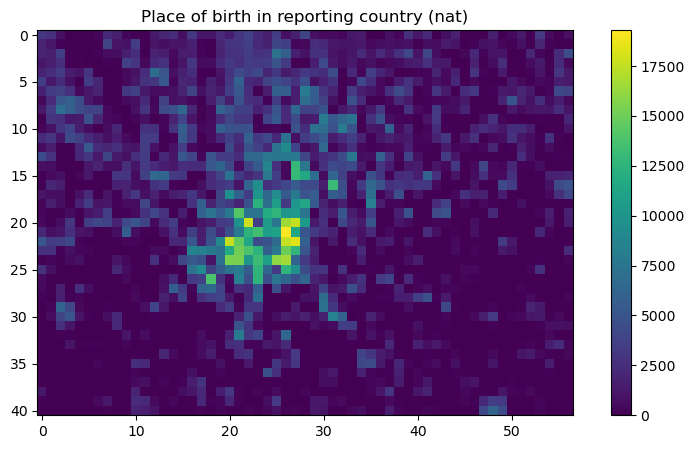

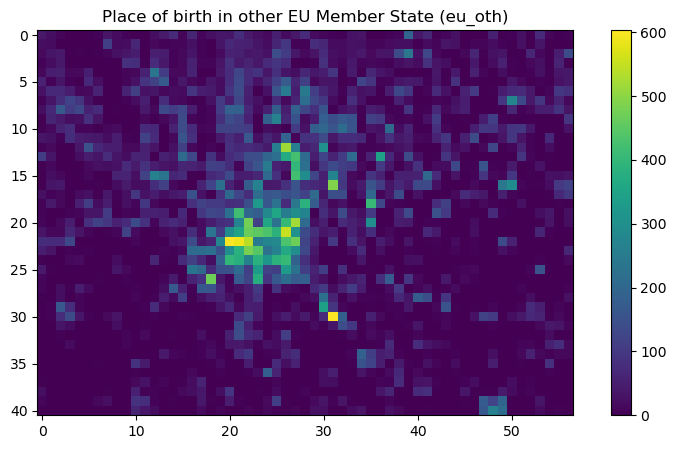

In [9]:
# Extract the bands from the list
nat_band = bands[0]['nat.tif']
eu_oth_band = bands[0]['eu_oth.tif']

# Plot the 'nat' band
plt.figure(figsize=(10, 5))
plt.title('Place of birth in reporting country (nat)')
plt.imshow(nat_band, cmap='viridis')
plt.colorbar()
plt.show()

# Plot the 'eu_oth' band
plt.figure(figsize=(10, 5))
plt.title('Place of birth in other EU Member State (eu_oth)')
plt.imshow(eu_oth_band, cmap='viridis')
plt.colorbar()
plt.show()

### Accessing data from the Global Human Settlement layer

In the following cells we will repeat the previous steps, but add a search function beforehand to search for available timestamps, since this products has multiple date. For this purpose, we will use the [Catalog API](https://documentation.dataspace.copernicus.eu/APIs/SentinelHub/Catalog.html).

In [10]:
# Initialize the catalog
catalog = SentinelHubCatalog(config=config)

# Search based on the collection ID
ghsl_collection = DataCollection.define_byoc("11ba24a5-b5ba-4f6a-935d-f7b767fb479f")
catalog.get_collection(ghsl_collection)


# Find entries for a specific area
time_interval = "1970-01-01", "2030-01-01"

search_iterator = catalog.search(
    ghsl_collection,
    bbox=bbox, # reuse the previously defined bbox
    time=time_interval,
    fields={"include": ["id", "properties.datetime"], "exclude": []},
)

results = list(search_iterator)
print("Total number of results:", len(results))
print("Dates:", [x["properties"]["datetime"] for x in results])


Total number of results: 9
Dates: ['2030-01-01T00:00:00Z', '2025-01-01T00:00:00Z', '2020-01-01T00:00:00Z', '2015-01-01T00:00:00Z', '2010-01-01T00:00:00Z', '2005-01-01T00:00:00Z', '2000-01-01T00:00:00Z', '1995-01-01T00:00:00Z', '1990-01-01T00:00:00Z']


Now we have an overview of the dates available, we can fetch the raw data in a similar way to the previous dataset.

In [11]:
evalscript_1band = """
    //VERSION=3

function setup() {
  // This specifies inputs and outputs of the script.
  return {
    input: [
      {
        bands: ["GHS_POP"],
      },
    ],
    output: [
      {
        id: "population",
        bands: 1,
        sampleType: SampleType.FLOAT32,
      }
    ],
  };
}

function evaluatePixel(sample) {
  // This function returns the output value for each pixel.
  return {
    population: [sample.GHS_POP],
  };
}

"""

In [12]:
request_ghsl = SentinelHubRequest(
    evalscript=evalscript_1band,
    input_data=[
        SentinelHubRequest.input_data(
            # Here we use the collection defined in the description further up
            DataCollection.define_byoc("11ba24a5-b5ba-4f6a-935d-f7b767fb479f"),
            # The time interval for the data is a fixed date (see the description further up)
            time_interval=("2025-01-01", "2025-01-01"),
        )
    ],
    responses=[
        SentinelHubRequest.output_response("population", MimeType.TIFF),
    ],
    bbox=bbox,
    size=bbox_size,
    data_folder="results",
    config=config,
)

### Run the request and download the data locally

In [13]:
ghsl_band = request_ghsl.get_data(save_data=True)

#### Plot the results

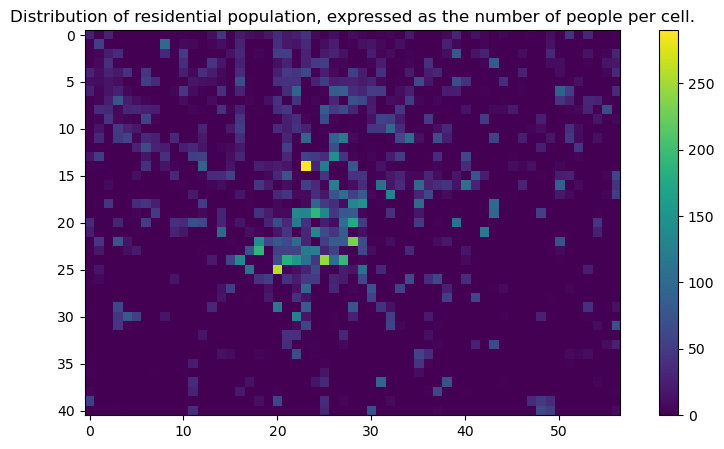

In [14]:
# Extract the bands from the list
pop_band = ghsl_band[0]

# Plot the 'nat' band
plt.figure(figsize=(10, 5))
plt.title('Distribution of residential population, expressed as the number of people per cell.')
plt.imshow(pop_band, cmap='viridis')
plt.colorbar()
plt.show()

## How to bring my own data?

Bring Your Own COG API (or shortly "BYOC") enables you to import your own data in Sentinel Hub and access it just like any other data you are used to. In order to use it, you need a Copernicus Service account and the data have to be stored in a COG format on an S3 bucket.

[The documentation page](https://documentation.dataspace.copernicus.eu/APIs/SentinelHub/Byoc.html) about the API provides an overview on data ingestion.

You can follow the [Python guide](https://sentinelhub-py.readthedocs.io/en/latest/examples/byoc_request.html#Bring-Your-Own-COG) with detailed steps on how to read your files stored in your CreoDIAS S3 bucket and integrate them in the Sentinel Hub APIs.

_Note: you will need to adjust the configuration, as [described here](https://sentinelhub-py.readthedocs.io/en/latest/configure.html#copernicus-data-space-ecosystem-configuration) for the Copernicus Data Space Ecosystem._